In [2]:
import mne 
import matplotlib.pyplot as plt
import numpy as np 
from mne.preprocessing import ICA, create_eog_epochs, create_ecg_epochs #funkcje ica
from mne_icalabel import label_components #ica-label algorytm
import onnxruntime #biblioteka do obsługi ica-label
#backend matplotliba 
%matplotlib qt 

In [3]:
"""USTAWIENIA DO ZAŁADOWANIA DANYCH"""
d_path = "eeg_files/20241017_kp.bdf" 
ch_eog = ["EXG1","EXG2"] #kanaly eog
ch_ecg = ["EXG3","EXG4"] #kanaly ecg
ch_exclude = [f"EXG{i}" for i in range(5,9)]



In [4]:
"""ZAŁADOWANIE DANYCH I USTAWIENIE UKŁADU ELEKTROD"""
raw = mne.io.read_raw_bdf(
    d_path, preload = True, eog = ch_eog, misc = ch_ecg, exclude = ch_exclude 
)
raw.set_montage("biosemi64") #ustawienie montazu biosemi
#załadowanie danych

Extracting EDF parameters from /Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/eeg_files/20241017_kp.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2928639  =      0.000 ...  1430.000 secs...


<RawEDF | 20241017_kp.bdf, 69 x 2928640 (1430.0 s), ~1.51 GiB, data loaded>

In [5]:
"""PARAMETRY FILTRACJI"""
bandpass_low = 0.1 #dolne pasmo
bandpass_high = 50 #górne pasmo
notch = 50 
raw.notch_filter(notch)
raw.filter(bandpass_low,bandpass_high) 


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 13517 samples (6.600 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 67585 samples (33.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


<RawEDF | 20241017_kp.bdf, 69 x 2928640 (1430.0 s), ~1.51 GiB, data loaded>

In [6]:
"""USTAWIENIE REFERENCJI"""
raw.set_eeg_reference('average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawEDF | 20241017_kp.bdf, 69 x 2928640 (1430.0 s), ~1.51 GiB, data loaded>

Using matplotlib as 2D backend.


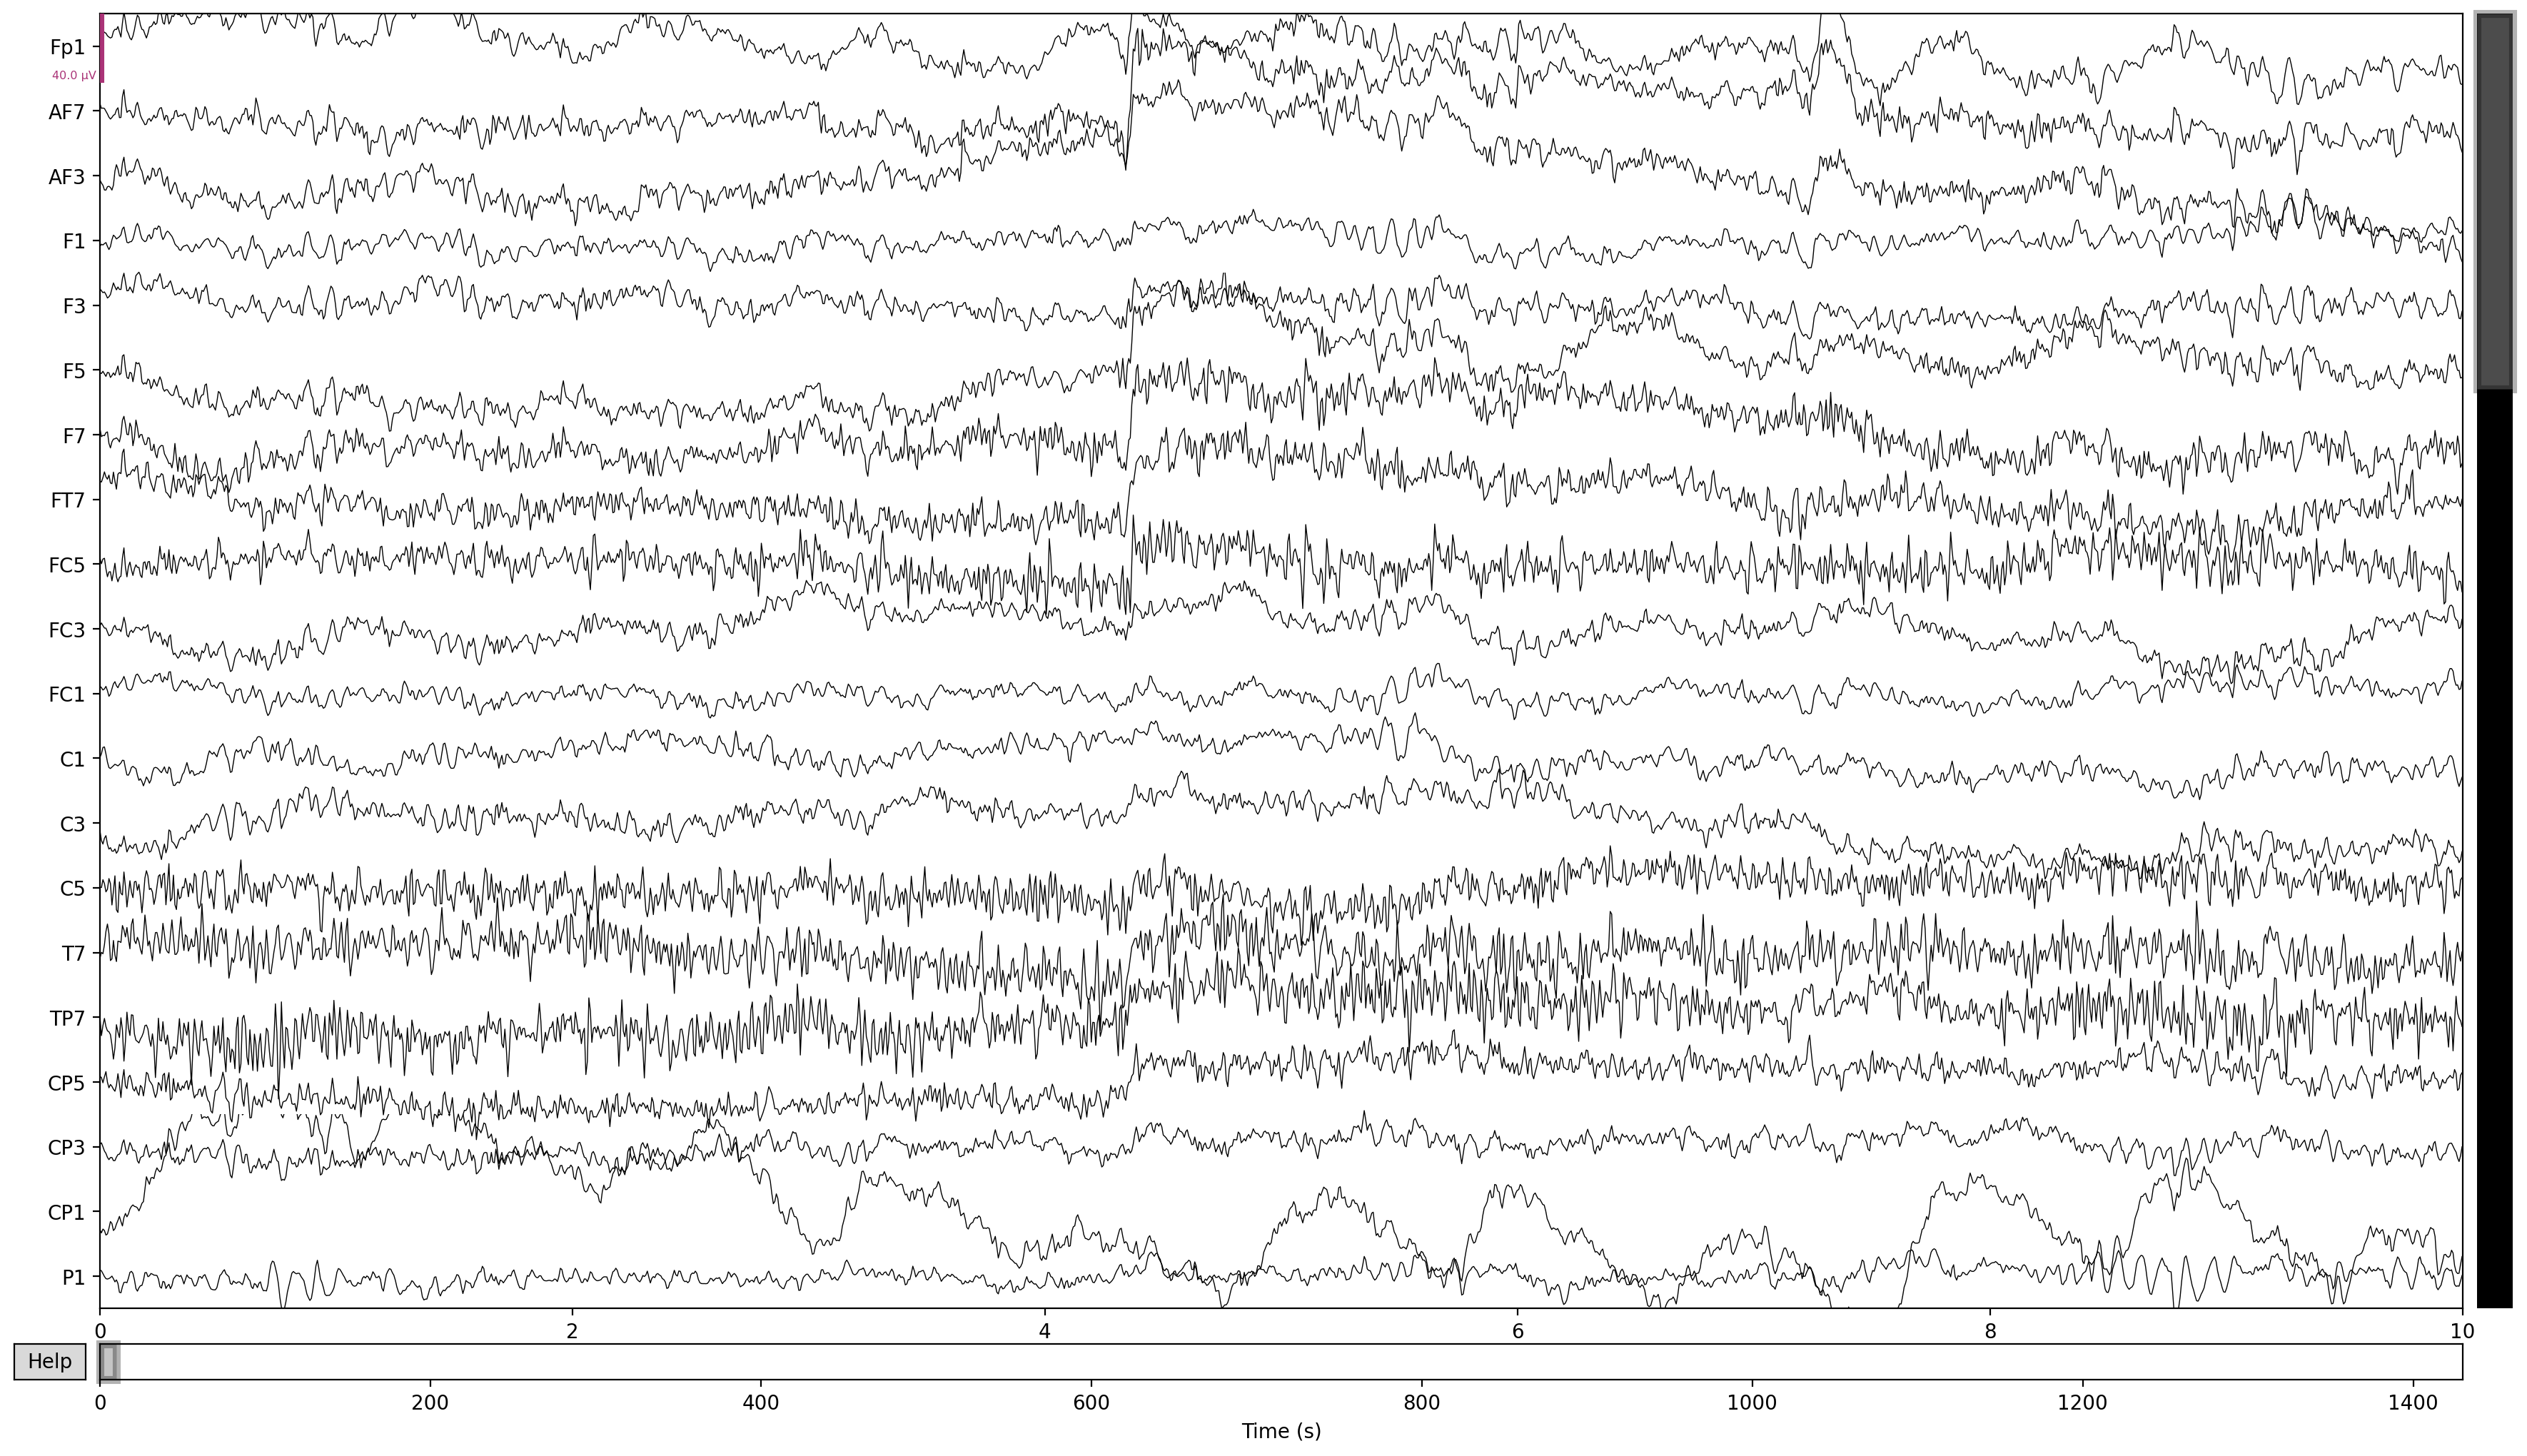

2025-05-07 16:40:40.773 Python[79758:10020366] +[IMKClient subclass]: chose IMKClient_Modern
2025-05-07 16:40:40.773 Python[79758:10020366] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Channels marked as bad:
none


2025-05-07 16:40:44.522 Python[79758:10020366] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-07 16:40:44.522 Python[79758:10020366] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-07 16:40:44.522 Python[79758:10020366] Text input context does not respond to _valueForTIProperty:


In [7]:
raw.plot()

In [8]:
"""USTAWIENIE ADNOTACJI DLA SEGMENTÓW Z ARTEFAKTEM RUCHOWYM"""
onset_bad_segment = 965.0
duration_bad_segment = 20.0
description_bad_segment = "BAD_movement_artifact"
my_annotations = mne.Annotations(onset=[onset_bad_segment],duration=[duration_bad_segment],description=[description_bad_segment])
raw.set_annotations(my_annotations)

<RawEDF | 20241017_kp.bdf, 69 x 2928640 (1430.0 s), ~1.51 GiB, data loaded>

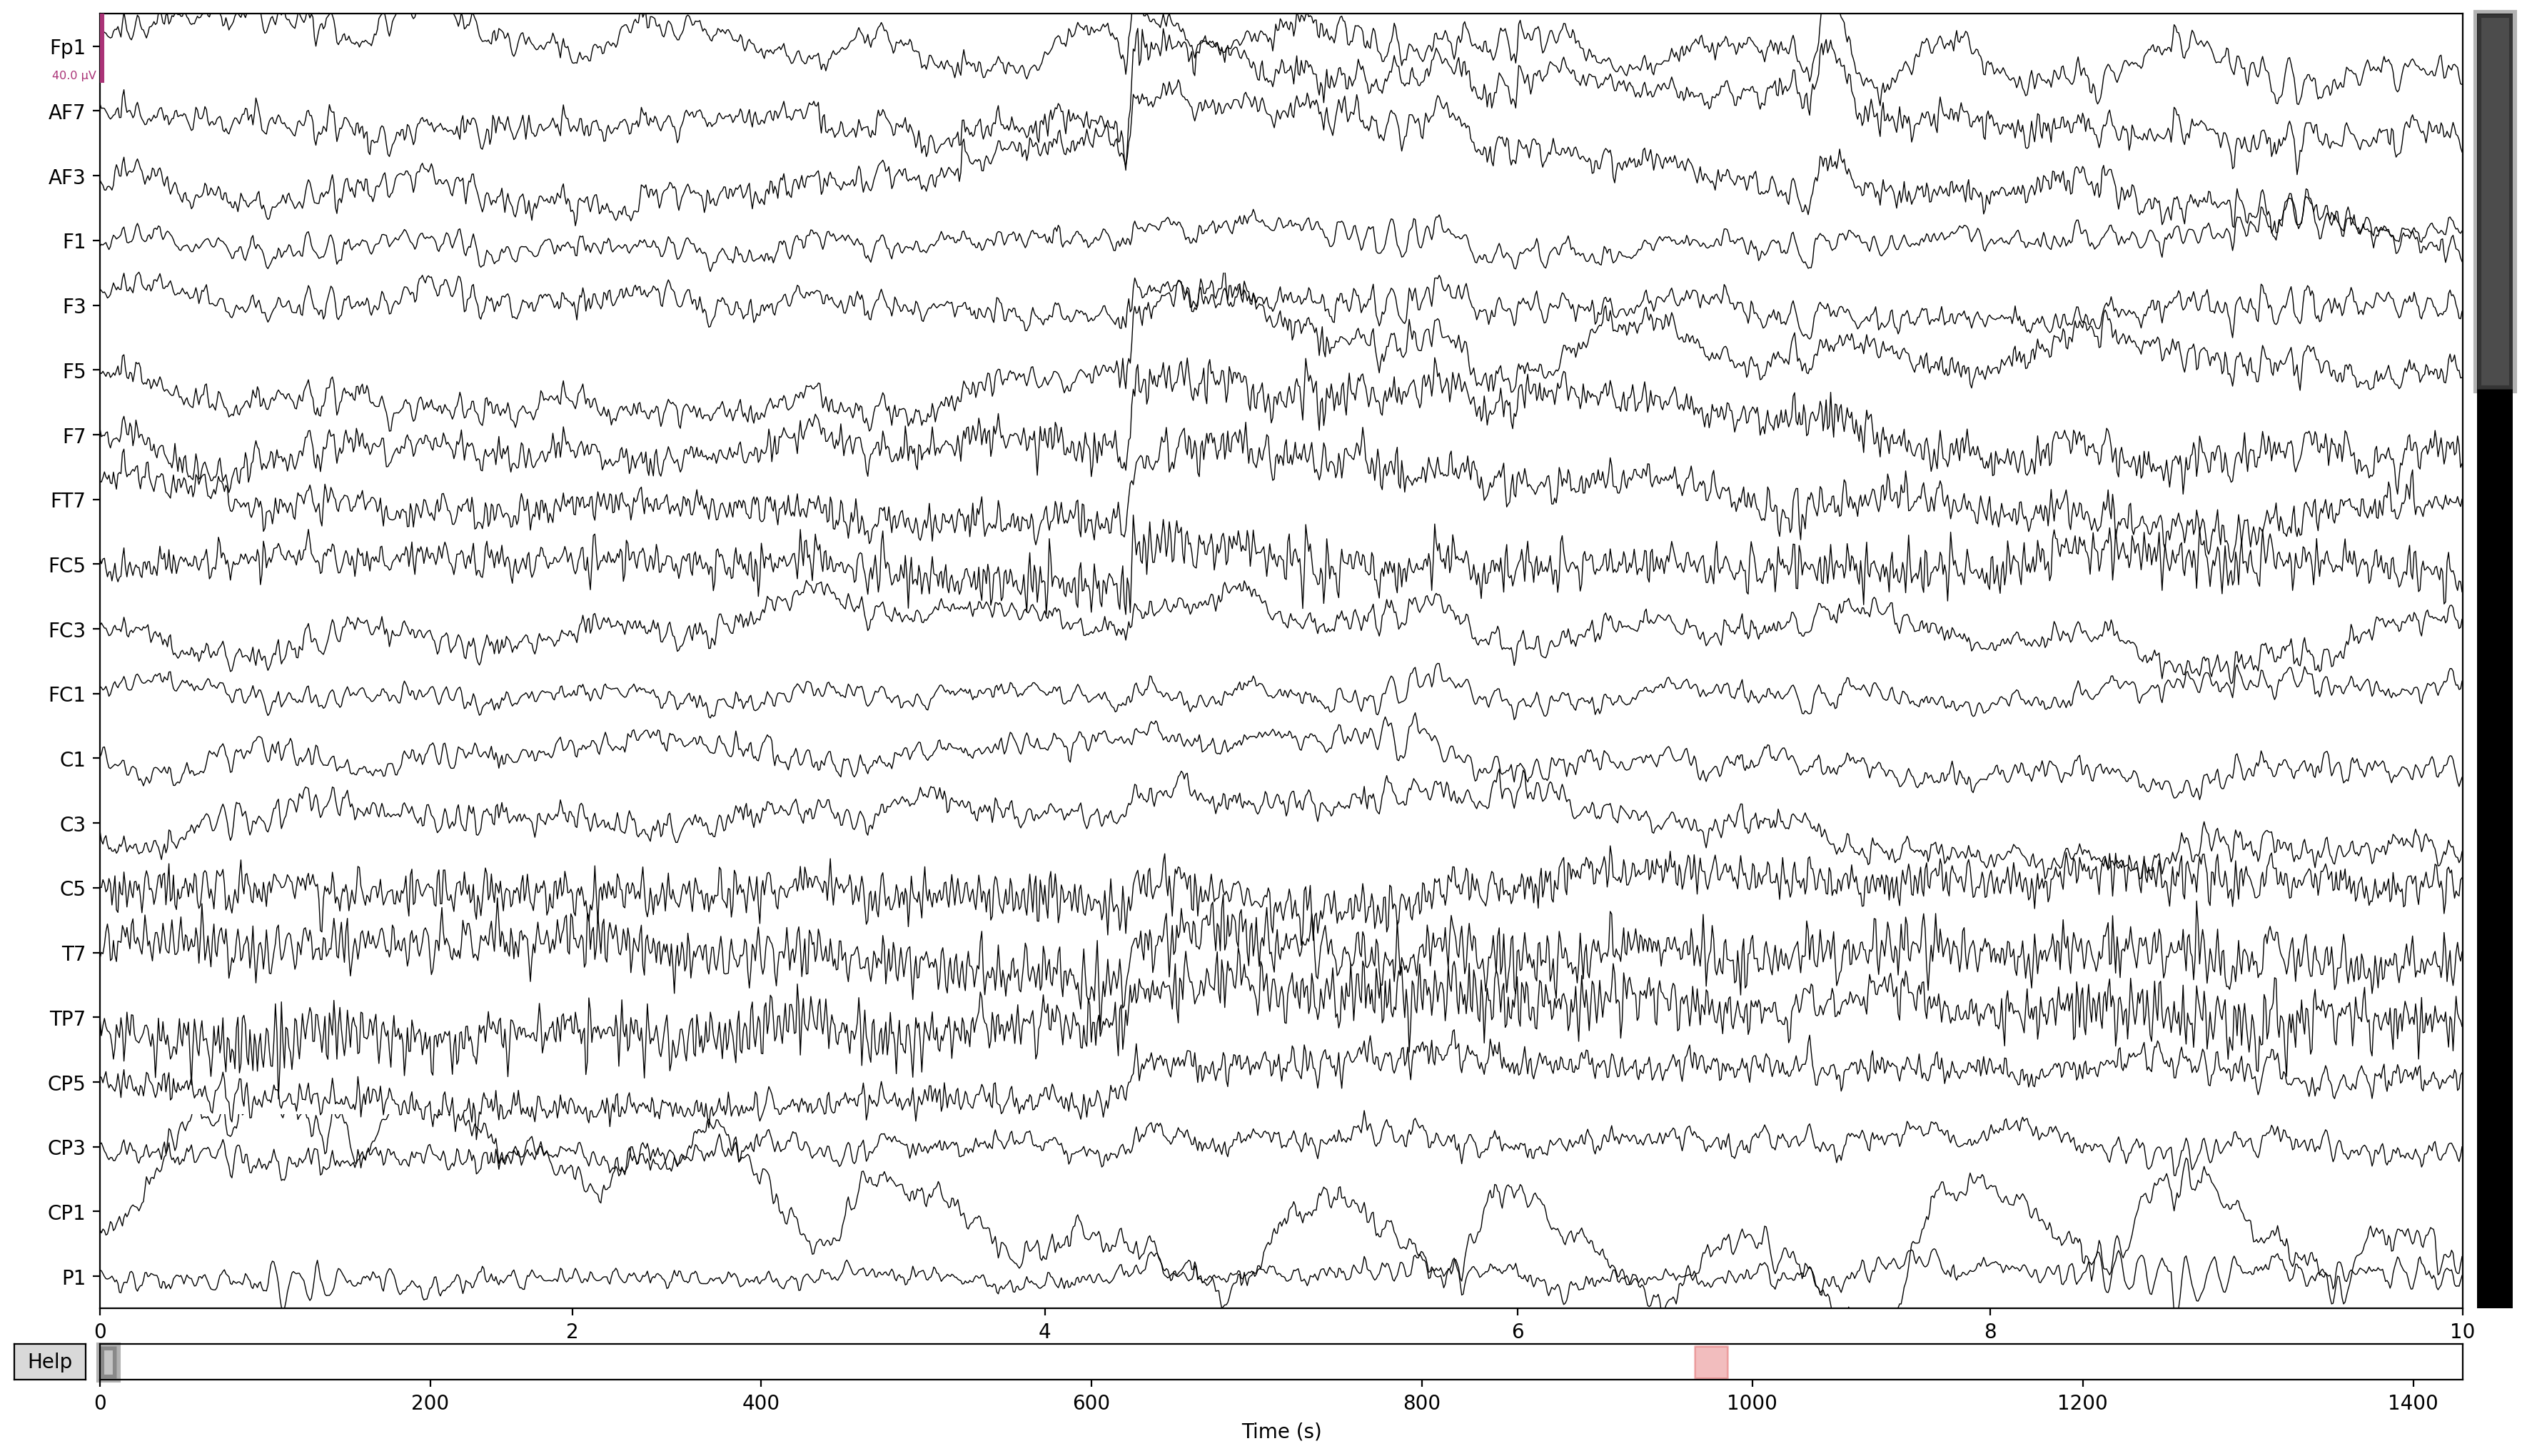

2025-05-07 16:41:05.325 Python[79758:10020366] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-07 16:41:05.325 Python[79758:10020366] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-07 16:41:05.325 Python[79758:10020366] Text input context does not respond to _valueForTIProperty:


Channels marked as bad:
none


In [9]:
raw.plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 6759 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


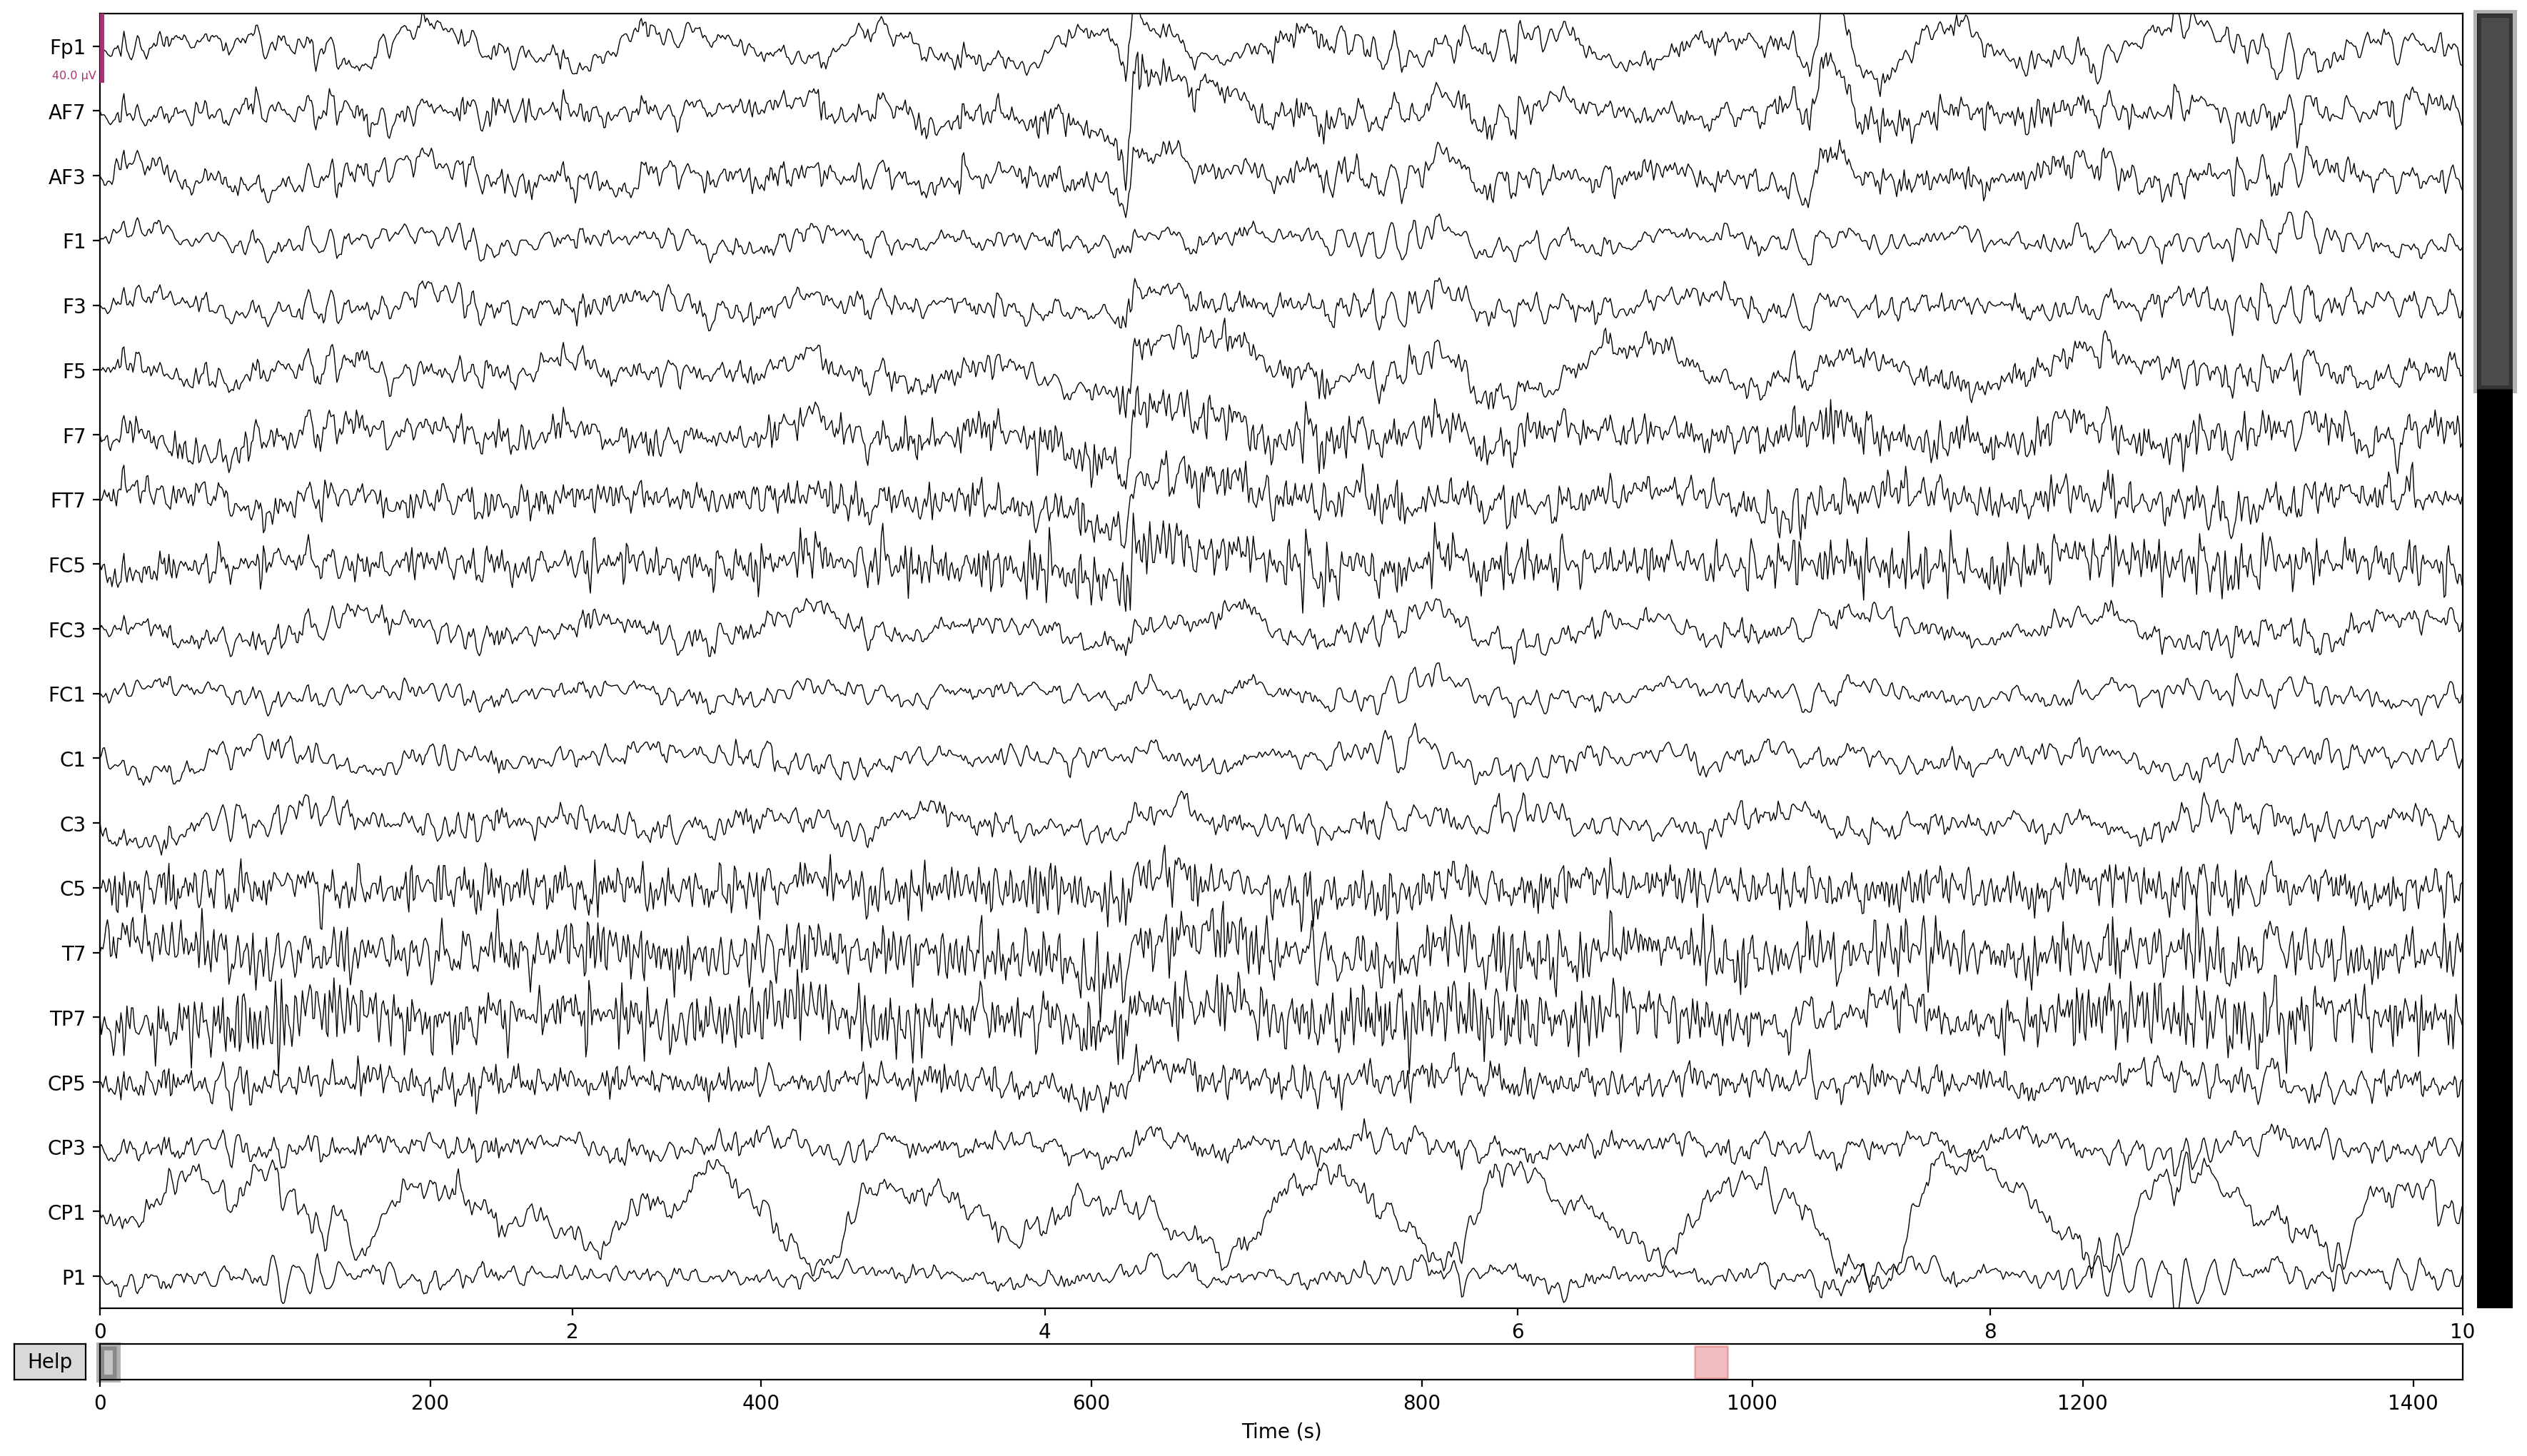

2025-05-07 16:43:14.802 Python[79758:10020366] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-07 16:43:14.802 Python[79758:10020366] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-07 16:43:14.802 Python[79758:10020366] Text input context does not respond to _valueForTIProperty:


Channels marked as bad:
none


2025-05-07 16:43:18.879 Python[79758:10020366] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-07 16:43:18.879 Python[79758:10020366] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-07 16:43:18.879 Python[79758:10020366] Text input context does not respond to _valueForTIProperty:


In [11]:
"""DOSTOSOWANIE POD ICA"""

filt_raw = raw.copy().filter(l_freq=1.0, h_freq=100.0)#dla algorytmu ica-label
filt_raw.set_montage("biosemi64")
filt_raw.set_eeg_reference("average")
filt_raw.plot()



In [13]:
"""ZAINICJOWANIE ALGORYTMU ICA"""

ica = ICA(
    max_iter="auto",  #automatyczna liczba iteracji
    method="infomax",  #wymog ica-label
    random_state=97, #ziarno
    fit_params=dict(extended=True), #wymog ica-label
)
ica.fit(filt_raw,reject_by_annotation=True)  


Reading /Users/szymbierz/Desktop/wszystko/notebooks/statystyka/inne/eeg/rozwiazanie_ica_bad_segment-ica.fif ...
Now restoring ICA solution ...
Ready.


In [15]:
#ica.plot_components()

Creating RawArray with float64 data, n_channels=3, n_times=2928640
    Range : 0 ... 2928639 =      0.000 ...  1430.000 secs
Ready.


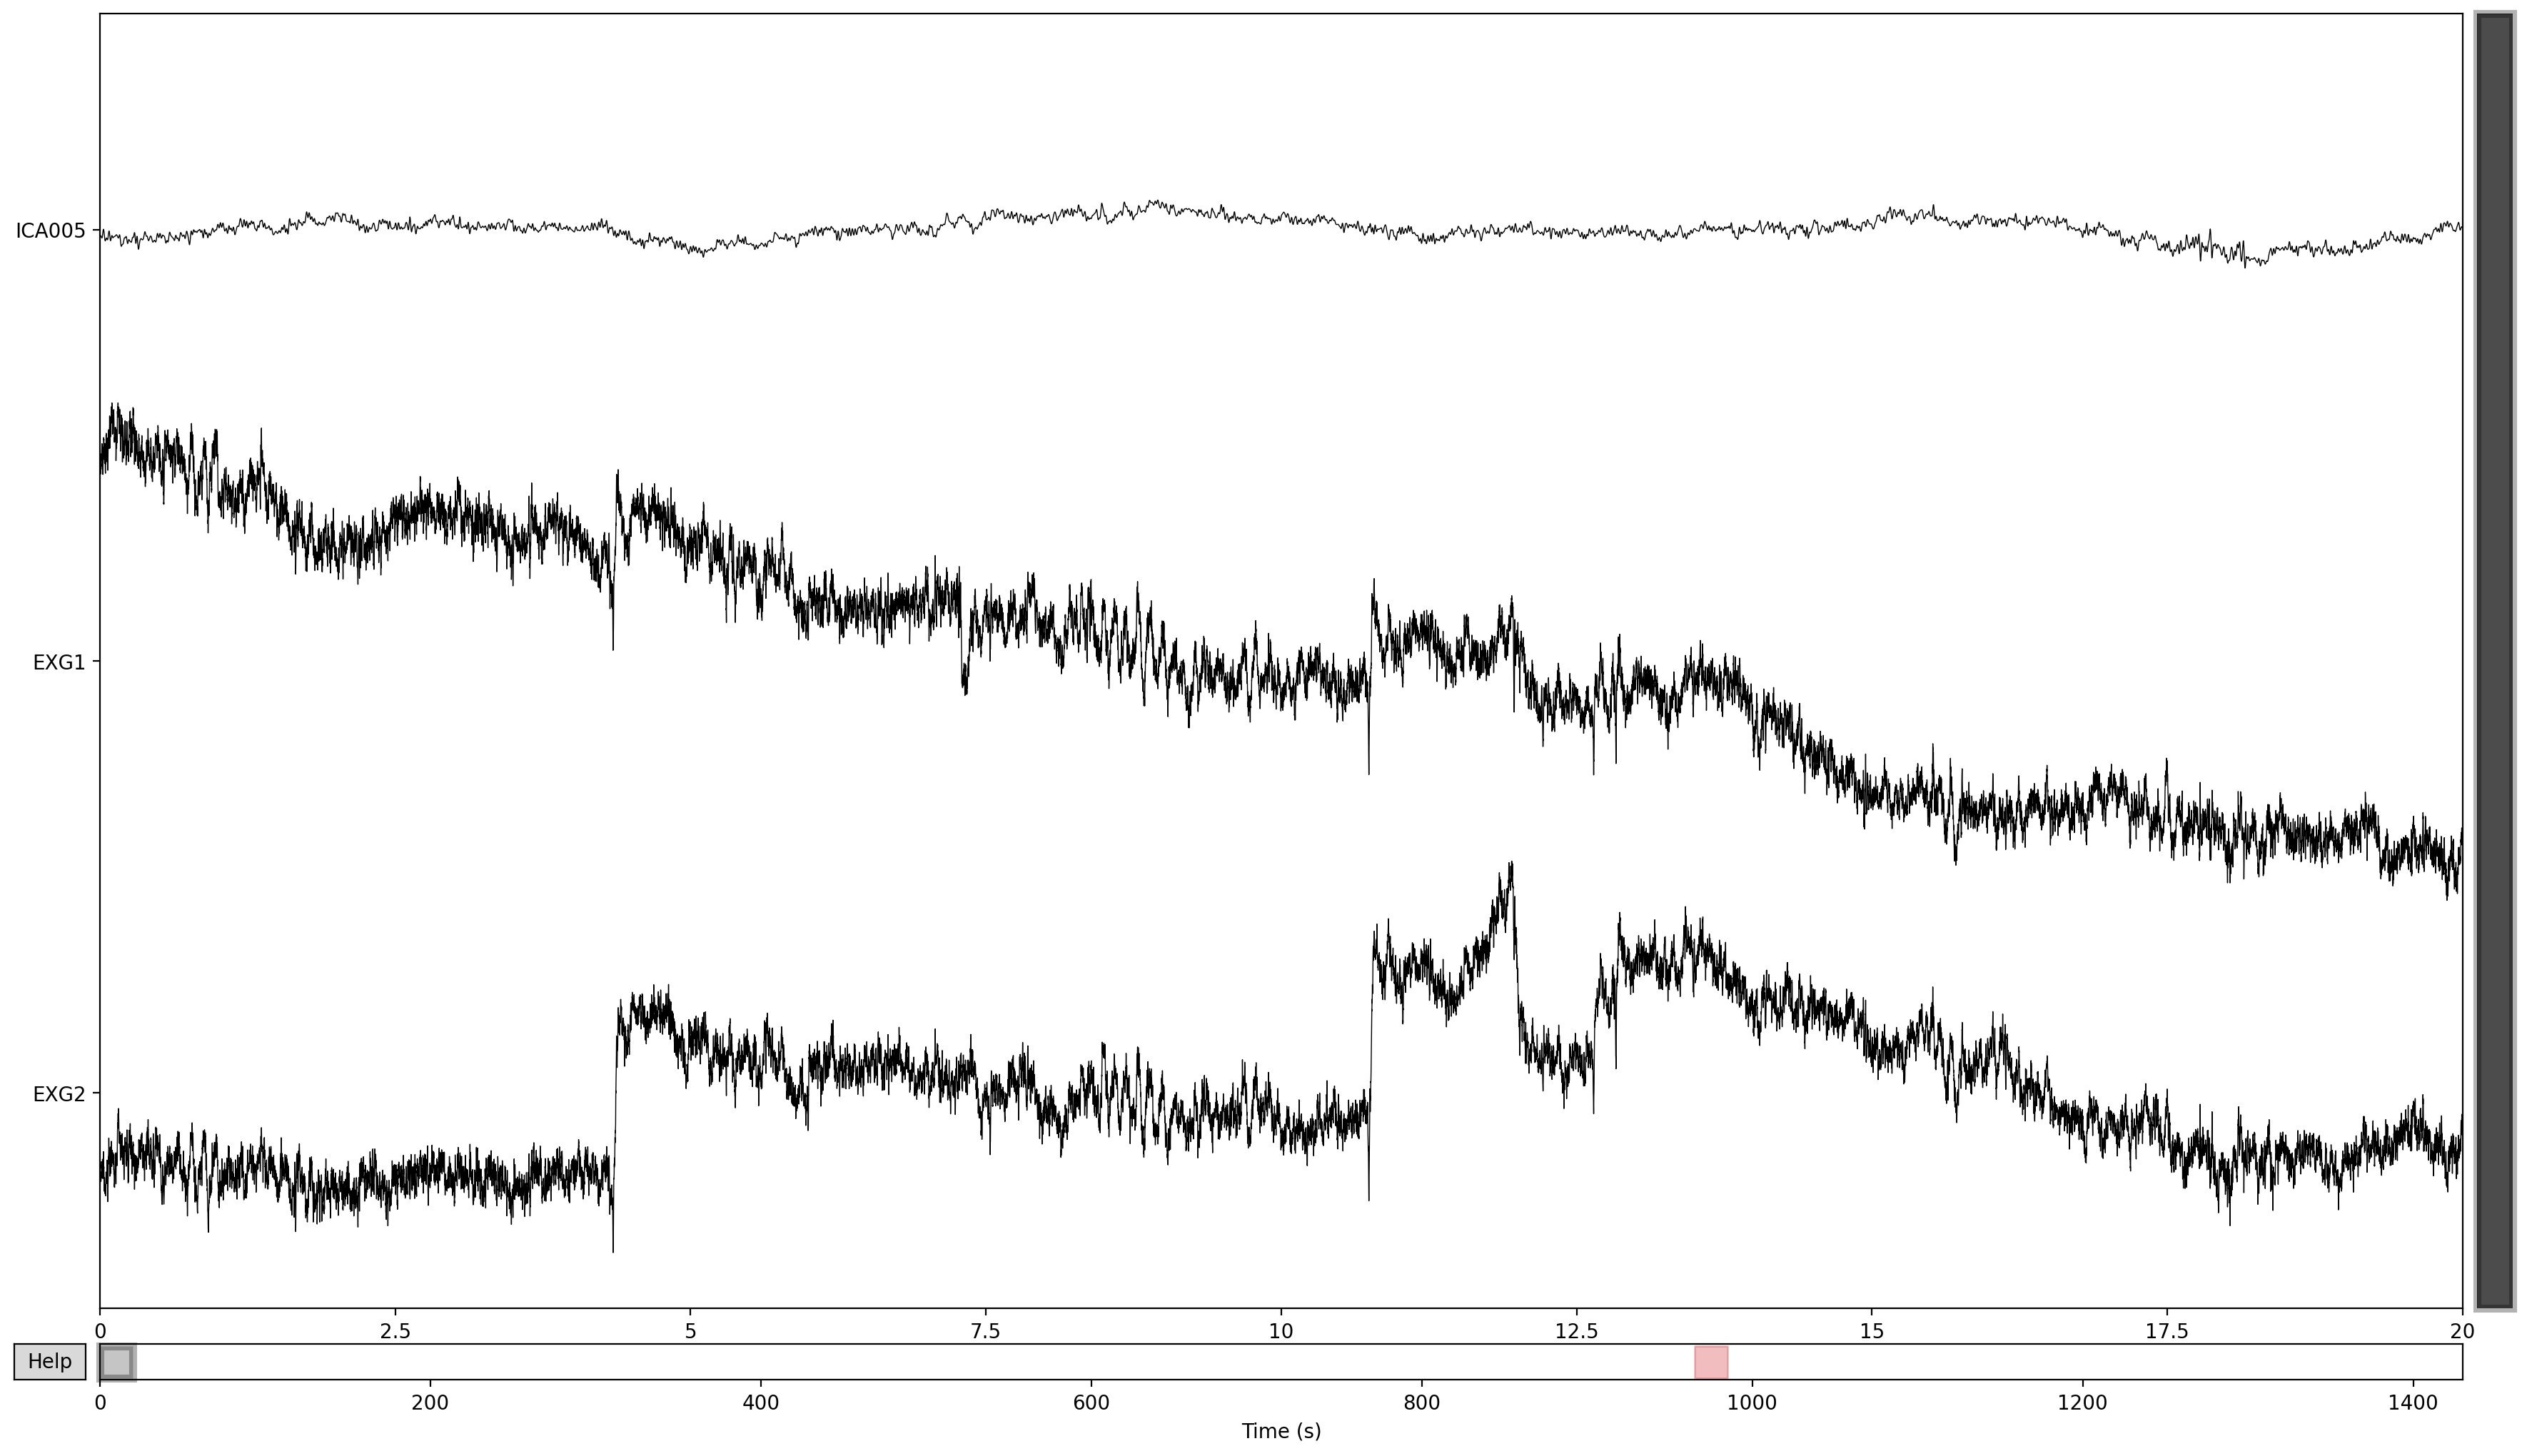

In [122]:
ica.plot_sources(raw,picks=[5])

In [27]:
ica.plot_properties(raw,picks=[22])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
704 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 1400x1200 with 6 Axes>]

In [16]:
eog_indices, eog_scores = ica.find_bads_eog(raw, measure="correlation",threshold=0.6)
print(eog_indices)

Using EOG channels: EXG1, EXG2
Omitting 40960 of 2928640 (1.40%) samples, retaining 2887680 (98.60%) samples.
Omitting 40960 of 2928640 (1.40%) samples, retaining 2887680 (98.60%) samples.
Omitting 40960 of 2928640 (1.40%) samples, retaining 2887680 (98.60%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)

Omitting 40960 of 2928640 (1.40%) samples, retaining 2887680 (98.60%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)

[np.int64(1), np.int64(0)]


In [17]:
eog_indices_2, eog_scores_2 = ica.find_bads_eog(raw)
print(eog_indices_2)

Using EOG channels: EXG1, EXG2
Omitting 40960 of 2928640 (1.40%) samples, retaining 2887680 (98.60%) samples.
Omitting 40960 of 2928640 (1.40%) samples, retaining 2887680 (98.60%) samples.
Omitting 40960 of 2928640 (1.40%) samples, retaining 2887680 (98.60%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)

Omitting 40960 of 2928640 (1.40%) samples, retaining 2887680 (98.60%) samples.
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 20480 samples (10.000 s)

[np.int64(1), np.int64(0), np.int64(11), np.int64(4)]


In [18]:
ic_labels_1 = label_components(filt_raw, ica, method='iclabel')
labels_1 = ic_labels_1["labels"]

/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_79758/1004248538.py:1: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels_1 = label_components(filt_raw, ica, method='iclabel')


In [19]:
ic_labels_2 = label_components(raw, ica, method='iclabel')
labels_2 = ic_labels_2["labels"]


/var/folders/vc/x50hw5690nj406s2rv6052180000gn/T/ipykernel_79758/438178098.py:1: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels_2 = label_components(raw, ica, method='iclabel')


In [20]:
if labels_1 == labels_2:
    print("Klasyfikacje komponentów ('labels') są identyczne.")
else:
    print("Klasyfikacje komponentów ('labels') SĄ RÓŻNE.")
    # Możesz chcieć zobaczyć różnice:
    for i, (l1, l2) in enumerate(zip(labels_1, labels_2)):
        if l1 != l2:
            print(f"  Komponent {i}: {l1} vs {l2}")

Klasyfikacje komponentów ('labels') SĄ RÓŻNE.
  Komponent 10: channel noise vs other
  Komponent 15: brain vs other
  Komponent 20: muscle artifact vs brain
  Komponent 21: brain vs other
  Komponent 22: muscle artifact vs other
  Komponent 24: muscle artifact vs brain
  Komponent 27: muscle artifact vs other
  Komponent 29: muscle artifact vs other
  Komponent 30: muscle artifact vs other
  Komponent 33: muscle artifact vs channel noise
  Komponent 34: muscle artifact vs other
  Komponent 36: muscle artifact vs brain
  Komponent 39: muscle artifact vs other
  Komponent 40: muscle artifact vs channel noise
  Komponent 46: other vs brain
  Komponent 49: channel noise vs other
  Komponent 50: channel noise vs other
  Komponent 51: muscle artifact vs other
  Komponent 58: eye blink vs other


In [21]:
labels_list = ic_labels_1["labels"]
count_other = labels_list.count("other")

print(f"Liczba komponentów oznaczonych jako 'other': {count_other}")
print(count_other)

Liczba komponentów oznaczonych jako 'other': 19
19


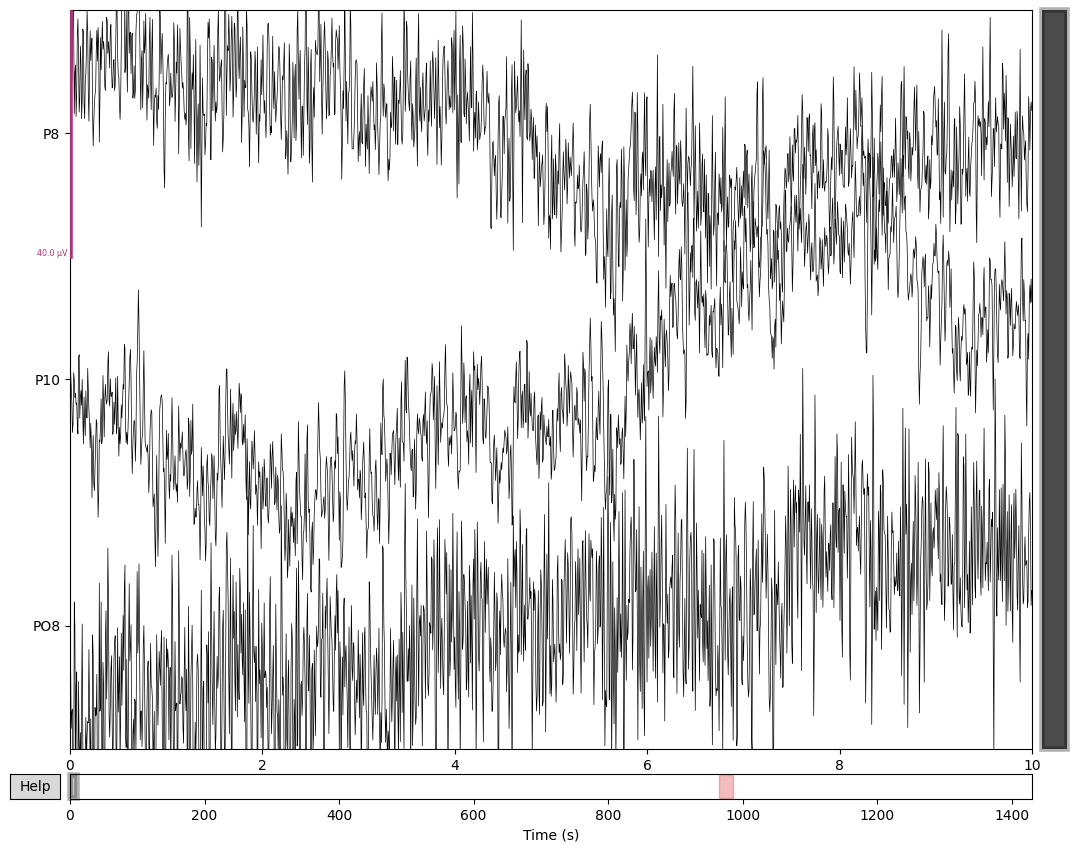

2025-05-07 17:41:15.571 Python[79758:10020366] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-07 17:41:15.571 Python[79758:10020366] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-07 17:41:15.571 Python[79758:10020366] Text input context does not respond to _valueForTIProperty:


Channels marked as bad:
none


2025-05-07 17:57:08.462 Python[79758:10020366] _TIPropertyValueIsValid called with 16 on nil context!
2025-05-07 17:57:08.462 Python[79758:10020366] imkxpc_getApplicationProperty:reply: called with incorrect property value 16, bailing.
2025-05-07 17:57:08.462 Python[79758:10020366] Text input context does not respond to _valueForTIProperty:


In [26]:
raw.plot(picks=["P8","P10","PO8"])


In [29]:
for idx,label in enumerate(labels_1):
    if label == "other":
        print(f"{idx} : {label}")

3 : other
8 : other
14 : other
18 : other
23 : other
25 : other
26 : other
37 : other
42 : other
43 : other
44 : other
46 : other
54 : other
55 : other
56 : other
57 : other
60 : other
61 : other
62 : other


In [34]:
ica.plot_properties(raw,picks=[54,55,56])

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
704 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
704 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
704 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>,
 <Figure size 1400x1200 with 6 Axes>]